# 정류장별 6시~10시 승객수 분석 및 히트맵

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')


df = pd.read_csv("../광진구 공모전/station_time_populations_6시_10시.csv")
station_total = df.groupby("processed_station_name")["승객수_집계"].sum().reset_index().sort_values(by="승객수_집계", ascending=False)
print(station_total)


    processed_station_name  승객수_집계
2                     강변역A  111698
39                 구의역4번출구   82498
1               강변역.테크노마트앞   75616
34                구의아크로리버앞   37540
83           성수대우프레시아1차아파트   33017
..                     ...     ...
159               중곡아파트.종점    1480
143               종합의료복합단지    1259
167               천주교화양동성당    1007
31                 구의교통차고지     481
152                  중곡동성당     480

[185 rows x 2 columns]


In [4]:
station_total

,processed_station_name,승객수_집계
2,강변역A,111698
39,구의역4번출구,82498
1,강변역.테크노마트앞,75616
34,구의아크로리버앞,37540
83,성수대우프레시아1차아파트,33017
...,...,...
159,중곡아파트.종점,1480
143,종합의료복합단지,1259
167,천주교화양동성당,1007
31,구의교통차고지,481


In [9]:
chunk_size = 19
total_rows = len(station_total)

for i in range(0, total_rows, chunk_size):
    print(f" {i//chunk_size + 1}")
    print(station_total.iloc[i:i+chunk_size])
    



 1
    processed_station_name  승객수_집계
2                     강변역A  111698
38                 구의역4번출구   82498
1               강변역.테크노마트앞   75616
33                구의아크로리버앞   37540
81           성수대우프레시아1차아파트   33017
5                건대로데오거리입구   32664
23                광진문화예술회관   32503
10                    광나루역   30001
106           어린이대공원후문아차산역   29994
15               광장동현대아파트앞   29679
115                 용마초등학교   28948
84                 성자초등학교앞   28222
93                   신성시장앞   28001
167             테크노마트앞.강변역   27602
121                자양1파출소앞   24649
180                  화양사거리   24423
49                     군자역   24134
42                국민은행자양지점   23784
34                     구의역   23545
 2
    processed_station_name  승객수_집계
52                  기원정사입구   21746
178                 현대아파트앞   21601
70              래미안구의파크스위트   20874
105               어린이대공원후문   20813
103            어린이대공원역3번출구   20271
133            자양하늘채베르아파트앞   19819
45                   군자교입구   19757
50            

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

# 데이터 불러오기
df = pd.read_csv("../광진구 공모전/station_time_populations_6시_10시.csv")

# 정류장별 승객수 합산 및 정렬
station_total = df.groupby("processed_station_name")["승객수_집계"] \
                  .sum().reset_index().sort_values(by="승객수_집계", ascending=False).reset_index(drop=True)

# 라벨링: 19개씩 묶어서 10점부터 1점까지 부여
chunk_size = 19
total_rows = len(station_total)
num_chunks = (total_rows + chunk_size - 1) // chunk_size  # 올림처리
labels = []

for i in range(num_chunks):
    score = max(10 - i, 1)  # 최소 점수는 1점
    labels.extend([score] * chunk_size)

# 길이 맞춰 자르기
labels = labels[:total_rows]
station_total["label"] = labels

# 저장
station_total.to_csv("../광진구 공모전/station_total_labeled_chunks.csv", index=False, encoding='utf-8-sig')

# 확인
print(station_total.head(25))


   processed_station_name  승객수_집계  label
0                    강변역A  111698     10
1                 구의역4번출구   82498     10
2              강변역.테크노마트앞   75616     10
3                구의아크로리버앞   37540     10
4           성수대우프레시아1차아파트   33017     10
5               건대로데오거리입구   32664     10
6                광진문화예술회관   32503     10
7                    광나루역   30001     10
8            어린이대공원후문아차산역   29994     10
9               광장동현대아파트앞   29679     10
10                 용마초등학교   28948     10
11                성자초등학교앞   28222     10
12                  신성시장앞   28001     10
13             테크노마트앞.강변역   27602     10
14                자양1파출소앞   24649     10
15                  화양사거리   24423     10
16                    군자역   24134     10
17               국민은행자양지점   23784     10
18                    구의역   23545     10
19                 기원정사입구   21746      9
20                 현대아파트앞   21601      9
21             래미안구의파크스위트   20874      9
22               어린이대공원후문   20813      9
23            어린

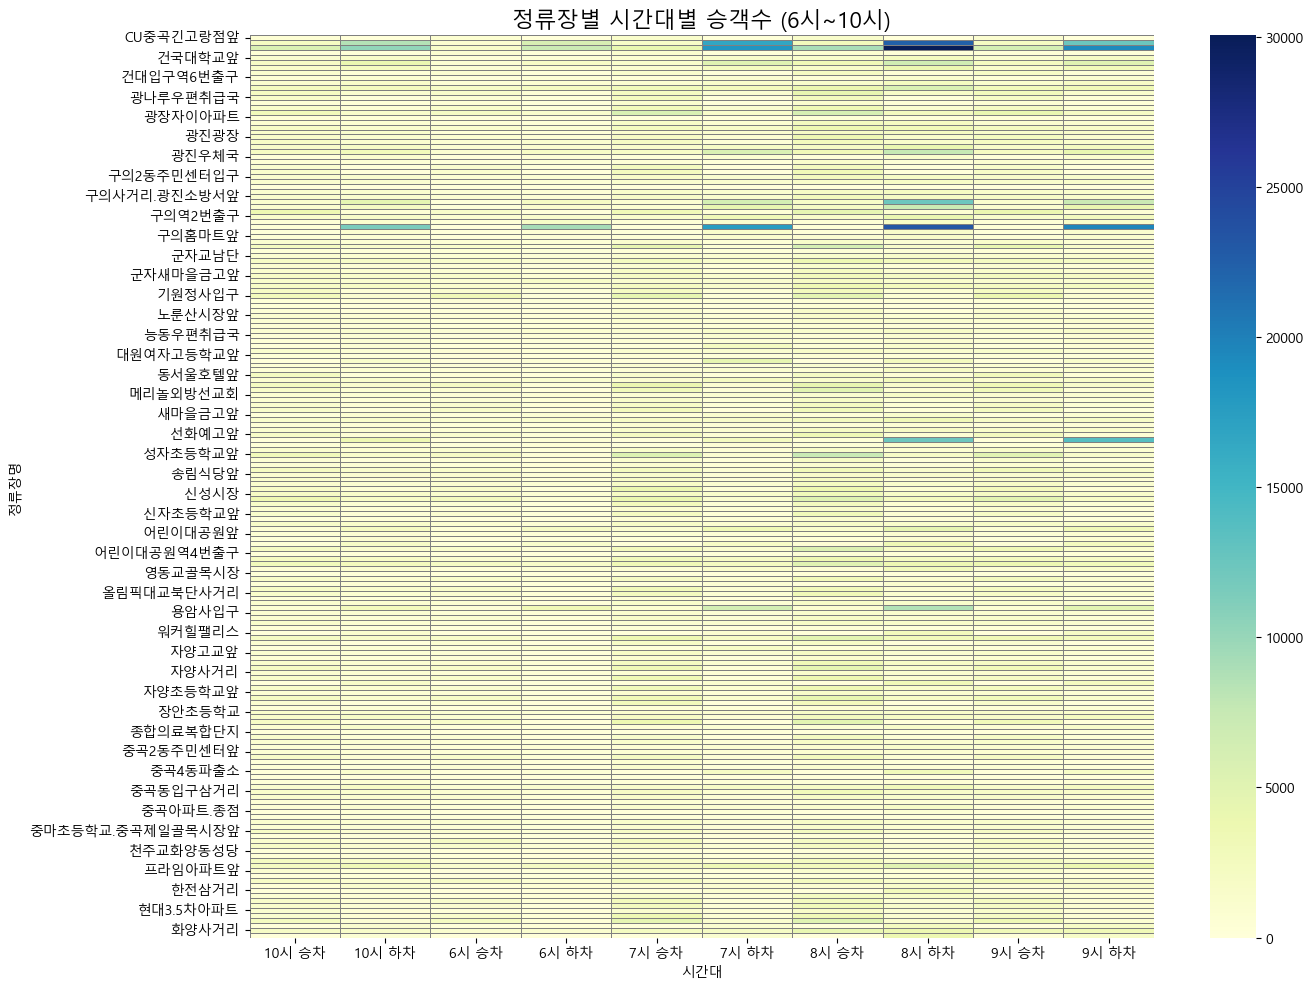

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = df.pivot_table(
    index="processed_station_name",
    columns="시간대",
    values="승객수_집계",
    fill_value=0
)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("정류장별 시간대별 승객수 (6시~10시)", fontsize=16)
plt.xlabel("시간대")
plt.ylabel("정류장명")
plt.tight_layout()
plt.show()
